# Titanic Data from kaggle 

# Training Dataset

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

# label encoding 
from sklearn import preprocessing

# scaling data
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Evaluation matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # for AUC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import VotingClassifier

#importing pickle for saving model
import pickle

In [2]:
train_df=pd.read_csv(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\data\train.csv',
                     index_col=0,header=0)
print(train_df.shape)
train_df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df=train_df[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked','Survived']]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S,NaN
freq,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [6]:
train_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

## Data Preprocessing

In [7]:
train_df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

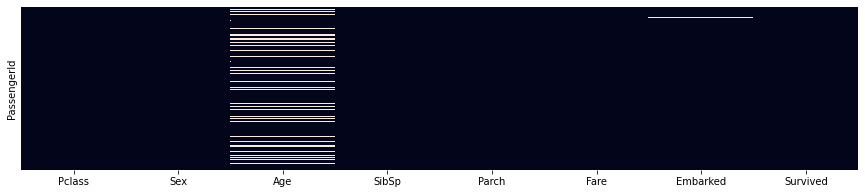

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64


In [8]:
plt.figure(figsize=(15,3))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)
plt.show()
print(train_df.isnull().sum())

In [9]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [10]:
train_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Pre-processing

In [11]:
# For preprocessing the data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

col=['Sex','Embarked']
for x in col:
    train_df[x]=le.fit_transform(train_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Sex
mapping {'female': 0, 'male': 1}
Feature Embarked
mapping {'C': 0, 'Q': 1, 'S': 2}


In [12]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,0
2,1,0,38.0,1,0,71.2833,0,1
3,3,0,26.0,0,0,7.9250,2,1
4,1,0,35.0,1,0,53.1000,2,1
5,3,1,35.0,0,0,8.0500,2,0


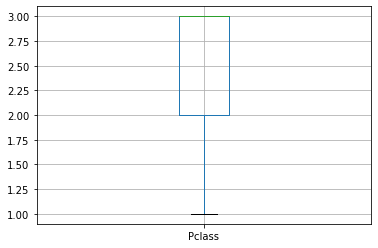

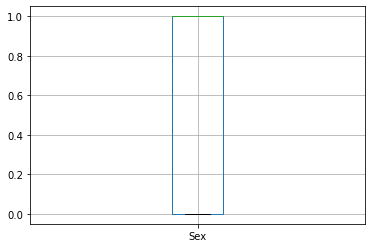

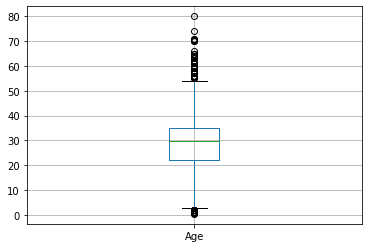

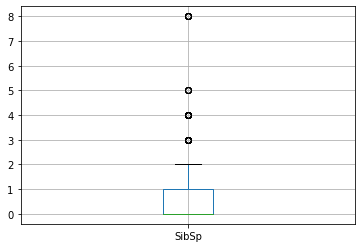

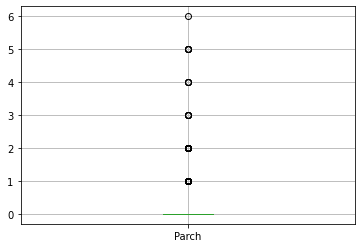

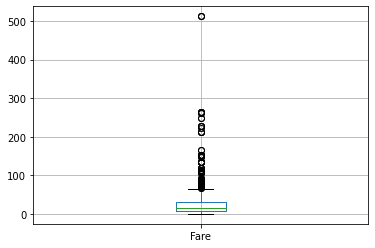

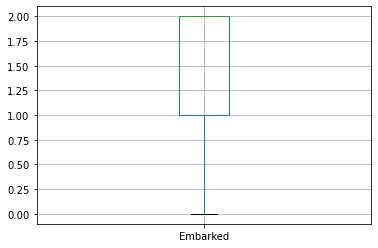

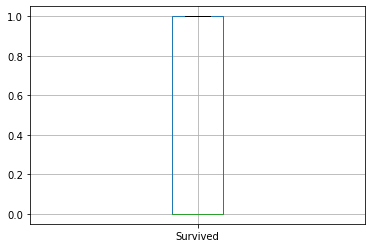

In [13]:
for i in train_df.columns:
    train_df.boxplot(column=i)
    plt.show()

In [14]:
train_df.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
Survived      int64
dtype: object

## Creating X and Y

In [15]:
X = train_df.iloc[:,0:-1]
Y = train_df.iloc[:,-1]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.82737724  0.73769513 -0.5924806  ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.63878901 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.2846632  ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354  0.         ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.2846632  ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.17706291 ... -0.47367361 -0.49237783
  -0.67817453]]


## Scaling Data

In [17]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 8.27377244e-01  7.37695132e-01 -5.92480600e-01 ... -4.73673609e-01
  -5.02445171e-01  5.85954143e-01]
 [-1.56610693e+00 -1.35557354e+00  6.38789012e-01 ... -4.73673609e-01
   7.86845294e-01 -1.94230320e+00]
 [ 8.27377244e-01 -1.35557354e+00 -2.84663197e-01 ... -4.73673609e-01
  -4.88854258e-01  5.85954143e-01]
 ...
 [ 8.27377244e-01 -1.35557354e+00 -2.23290646e-16 ...  2.00893337e+00
  -1.76263239e-01  5.85954143e-01]
 [-1.56610693e+00  7.37695132e-01 -2.84663197e-01 ... -4.73673609e-01
  -4.43810379e-02 -1.94230320e+00]
 [ 8.27377244e-01  7.37695132e-01  1.77062908e-01 ... -4.73673609e-01
  -4.92377828e-01 -6.78174528e-01]]


## Splitting Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

# print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0),

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[102  15]
 [ 17  45]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Accuracy of the model:  0.8212290502793296


## Logistic Tune Model

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier_tune=LogisticRegression()

classifier_tune.fit(X_train,Y_train)

Y_pred=classifier_tune.predict(X_test)
print(list(zip(Y_test,Y_pred)))

# print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0),

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[102  15]
 [ 17  45]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Accuracy of the model:  0.8212290502793296


In [24]:
# store the predicted probabilities
y_pred_prob = classifier_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.91186547 0.08813453]
 [0.86334756 0.13665244]
 [0.88488306 0.11511694]
 [0.0776867  0.9223133 ]
 [0.1130915  0.8869085 ]
 [0.85927396 0.14072604]
 [0.88152683 0.11847317]
 [0.84780944 0.15219056]
 [0.90351545 0.09648455]
 [0.87078806 0.12921194]
 [0.73042855 0.26957145]
 [0.08055091 0.91944909]
 [0.31582171 0.68417829]
 [0.5325068  0.4674932 ]
 [0.75619789 0.24380211]
 [0.76314527 0.23685473]
 [0.97259932 0.02740068]
 [0.94427664 0.05572336]
 [0.43165786 0.56834214]
 [0.81991086 0.18008914]
 [0.92980668 0.07019332]
 [0.67092731 0.32907269]
 [0.28055366 0.71944634]
 [0.91990874 0.08009126]
 [0.70767807 0.29232193]
 [0.86287375 0.13712625]
 [0.86319942 0.13680058]
 [0.36953548 0.63046452]
 [0.86808445 0.13191555]
 [0.06979925 0.93020075]
 [0.11769949 0.88230051]
 [0.76314527 0.23685473]
 [0.27586214 0.72413786]
 [0.96338157 0.03661843]
 [0.20397068 0.79602932]
 [0.89672431 0.10327569]
 [0.32221179 0.67778821]
 [0.73150679 0.26849321]
 [0.86273408 0.13726592]
 [0.90350659 0.09649341]


In [25]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 34  , type 2 error : 14  , type 1 error: 20
Errors at threshold  0.41000000000000003 : 34  , type 2 error : 14  , type 1 error: 20
Errors at threshold  0.42000000000000004 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.43000000000000005 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.44000000000000006 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.45000000000000007 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.4600000000000001 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.4700000000000001 : 33  , type 2 error : 15  , type 1 error: 18
Errors at threshold  0.4800000000000001 : 30  , type 2 error : 15  , type 1 error: 15
Errors at threshold  0.4900000000000001 : 32  , type 2 error : 17  , type 1 error: 15
Errors at threshold  0.5000000000000001 : 32  , type 2 error : 17  , type 1 error: 15
Errors at threshold  0.5100000000000001 : 32  , type 2 error : 1

In [26]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [27]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[102  15]
 [ 17  45]]
Accuracy of the model:  0.8212290502793296
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [28]:
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8610421836228288


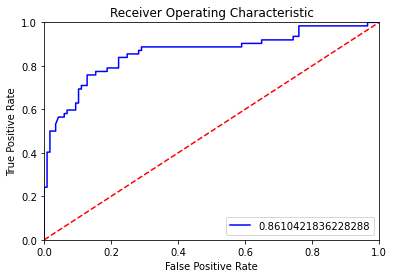

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## SGD Classifier

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [31]:
classifier_SGD=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                             early_stopping=True,n_iter_no_change=3)

classifier_SGD.fit(X_train,Y_train)

Y_pred=classifier_SGD.predict(X_test)

print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Pclass', -0.8376886043415431), ('Sex', -1.2974841424511374), ('Age', -0.4274040859409286), ('SibSp', -0.4786726013014683), ('Parch', -0.10511507187638773), ('Fare', 0.07123824691464688), ('Embarked', -0.2556668950060947)]
[-0.60320692]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[102  15]
 [ 17  45]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Accuracy of the model:  0.8212290502793296


## Tune SGD

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [34]:
classifier_SGD_tune=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                             early_stopping=True, n_iter_no_change=15)
classifier_SGD_tune.fit(X_train,Y_train)

Y_pred=classifier_SGD_tune.predict(X_test)

print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Pclass', -0.8376886043415431), ('Sex', -1.2974841424511374), ('Age', -0.4274040859409286), ('SibSp', -0.4786726013014683), ('Parch', -0.10511507187638773), ('Fare', 0.07123824691464688), ('Embarked', -0.2556668950060947)]
[-0.60320692]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[102  15]
 [ 16  46]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.75      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Accuracy of the model:  0.8268156424581006


In [36]:
classifier_SGD.n_iter_

4

In [37]:
# store the predicted probabilities
y_pred_prob = classifier_SGD_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.90755641 0.09244359]
 [0.85651409 0.14348591]
 [0.87902068 0.12097932]
 [0.08833103 0.91166897]
 [0.13844767 0.86155233]
 [0.85206704 0.14793296]
 [0.87552786 0.12447214]
 [0.85688141 0.14311859]
 [0.89865908 0.10134092]
 [0.8641806  0.1358194 ]
 [0.74376144 0.25623856]
 [0.08127837 0.91872163]
 [0.34269978 0.65730022]
 [0.57771351 0.42228649]
 [0.76956667 0.23043333]
 [0.7791389  0.2208611 ]
 [0.96980459 0.03019541]
 [0.93996184 0.06003816]
 [0.45147798 0.54852202]
 [0.81534643 0.18465357]
 [0.92675692 0.07324308]
 [0.69172139 0.30827861]
 [0.32014554 0.67985446]
 [0.91736121 0.08263879]
 [0.69632258 0.30367742]
 [0.85547724 0.14452276]
 [0.85619025 0.14380975]
 [0.35098807 0.64901193]
 [0.87653892 0.12346108]
 [0.08990155 0.91009845]
 [0.15013437 0.84986563]
 [0.7791389  0.2208611 ]
 [0.24877162 0.75122838]
 [0.96308142 0.03691858]
 [0.21502255 0.78497745]
 [0.89151409 0.10848591]
 [0.33462948 0.66537052]
 [0.66996478 0.33003522]
 [0.85753482 0.14246518]
 [0.89863968 0.10136032]


In [38]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 38  , type 2 error : 11  , type 1 error: 27
Errors at threshold  0.31 : 36  , type 2 error : 12  , type 1 error: 24
Errors at threshold  0.32 : 37  , type 2 error : 13  , type 1 error: 24
Errors at threshold  0.33 : 36  , type 2 error : 13  , type 1 error: 23
Errors at threshold  0.34 : 36  , type 2 error : 14  , type 1 error: 22
Errors at threshold  0.35000000000000003 : 36  , type 2 error : 14  , type 1 error: 22
Errors at threshold  0.36000000000000004 : 34  , type 2 error : 14  , type 1 error: 20
Errors at threshold  0.37000000000000005 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.38000000000000006 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.39000000000000007 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.4000000000000001 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.4100000000000001 : 33  , type 2 error : 14  , type 1 error: 19
Errors at threshold  0.42000000000

In [39]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [40]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[101  16]
 [ 16  46]]
Accuracy of the model:  0.8212290502793296
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



## KNN

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [42]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [43]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[108   9]
 [ 18  44]]
0.8491620111731844
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.83      0.71      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [44]:
int(np.sqrt(len(X_train)))

26

## Tune KNN

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [50]:
model_KNN_tune=KNeighborsClassifier(n_neighbors=27, metric='euclidean')

model_KNN_tune.fit(X_train,Y_train)

Y_pred=model_KNN_tune.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[108   9]
 [ 17  45]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.83      0.73      0.78        62

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



In [52]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,31):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.7206703910614525 for K-Value: 1
Accuracy is  0.8156424581005587 for K-Value: 2
Accuracy is  0.8268156424581006 for K-Value: 3
Accuracy is  0.8212290502793296 for K-Value: 4
Accuracy is  0.8156424581005587 for K-Value: 5
Accuracy is  0.8324022346368715 for K-Value: 6
Accuracy is  0.8379888268156425 for K-Value: 7
Accuracy is  0.8379888268156425 for K-Value: 8
Accuracy is  0.8435754189944135 for K-Value: 9
Accuracy is  0.8435754189944135 for K-Value: 10
Accuracy is  0.8547486033519553 for K-Value: 11
Accuracy is  0.8324022346368715 for K-Value: 12
Accuracy is  0.8324022346368715 for K-Value: 13
Accuracy is  0.8379888268156425 for K-Value: 14
Accuracy is  0.8435754189944135 for K-Value: 15
Accuracy is  0.8379888268156425 for K-Value: 16
Accuracy is  0.8324022346368715 for K-Value: 17
Accuracy is  0.8379888268156425 for K-Value: 18
Accuracy is  0.8268156424581006 for K-Value: 19
Accuracy is  0.8491620111731844 for K-Value: 20
Accuracy is  0.8491620111731844 for K-Value: 21
A

In [53]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

11 : 0.8547486033519553
27 : 0.8547486033519553


## Decision Tree

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [55]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0]


In [56]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[91 26]
 [16 46]]
0.7653631284916201
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       117
           1       0.64      0.74      0.69        62

    accuracy                           0.77       179
   macro avg       0.74      0.76      0.75       179
weighted avg       0.78      0.77      0.77       179



## Tune Decision Tree

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [58]:
model_DecisionTree_tune=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",
                                         min_samples_leaf=5,max_depth=100,min_samples_split=5,
                                         max_leaf_nodes=100)

model_DecisionTree_tune.fit(X_train,Y_train)

Y_pred=model_DecisionTree_tune.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[105  12]
 [ 13  49]]
0.8603351955307262
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       117
           1       0.80      0.79      0.80        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [60]:
model_DecisionTree.score(X_train,Y_train)

0.9859550561797753

In [61]:
model_DecisionTree.score(X_test,Y_test)

0.7653631284916201

In [62]:
# store the predicted probabilities
y_pred_prob = model_DecisionTree_tune.predict_proba(X_test)
print(y_pred_prob)

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.4        0.6       ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.875      0.125     ]
 [1.         0.        ]
 [0.25       0.75      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.71428571 0.28571429]
 [0.33333333 0.66666667]
 [0.57142857 0.42857143]
 [0.         1.        ]
 [1.         0.        ]
 [0.5        0.5       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.5        0.5       ]
 [0.         1.        ]
 [0.57142857 0.42857143]
 [0.25       0.75      ]
 [0.4        0.6       ]
 [0.91666667 0.08333333]
 [0.5        0.5       ]


In [63]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 36  , type 2 error : 6  , type 1 error: 30
Errors at threshold  0.31 : 36  , type 2 error : 6  , type 1 error: 30
Errors at threshold  0.32 : 36  , type 2 error : 6  , type 1 error: 30
Errors at threshold  0.33 : 36  , type 2 error : 6  , type 1 error: 30
Errors at threshold  0.34 : 33  , type 2 error : 9  , type 1 error: 24
Errors at threshold  0.35000000000000003 : 33  , type 2 error : 9  , type 1 error: 24
Errors at threshold  0.36000000000000004 : 33  , type 2 error : 9  , type 1 error: 24
Errors at threshold  0.37000000000000005 : 33  , type 2 error : 9  , type 1 error: 24
Errors at threshold  0.38000000000000006 : 33  , type 2 error : 9  , type 1 error: 24
Errors at threshold  0.39000000000000007 : 33  , type 2 error : 9  , type 1 error: 24
Errors at threshold  0.4000000000000001 : 35  , type 2 error : 12  , type 1 error: 23
Errors at threshold  0.4100000000000001 : 35  , type 2 error : 12  , type 1 error: 23
Errors at threshold  0.4200000000000001 : 35

## Extra Tree

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

In [84]:
model_EXT=ExtraTreesClassifier(n_estimators=800, random_state=10)

model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)

In [85]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[95 22]
 [18 44]]
0.776536312849162
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       117
           1       0.67      0.71      0.69        62

    accuracy                           0.78       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



## Random Forest

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [87]:
model_RandomForest=RandomForestClassifier(n_estimators=10, random_state=10)

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [88]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[100  17]
 [ 14  48]]
0.8268156424581006
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       117
           1       0.74      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



## Tune Random Forest

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [90]:
model_RandomForest_tune=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)

model_RandomForest_tune.fit(X_train,Y_train)

Y_pred=model_RandomForest_tune.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[109   8]
 [ 19  43]]
0.8491620111731844
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       117
           1       0.84      0.69      0.76        62

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.83       179
weighted avg       0.85      0.85      0.85       179



In [92]:
model_DecisionTree.score(X_test,Y_test)

0.7653631284916201

In [93]:
# store the predicted probabilities
y_pred_prob = model_RandomForest_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.85517255 0.14482745]
 [0.84039256 0.15960744]
 [0.83566442 0.16433558]
 [0.18583097 0.81416903]
 [0.19160658 0.80839342]
 [0.83566442 0.16433558]
 [0.83651948 0.16348052]
 [0.73583357 0.26416643]
 [0.84259793 0.15740207]
 [0.83566442 0.16433558]
 [0.73843515 0.26156485]
 [0.22230869 0.77769131]
 [0.2915627  0.7084373 ]
 [0.6529809  0.3470191 ]
 [0.75626437 0.24373563]
 [0.82336287 0.17663713]
 [0.82228894 0.17771106]
 [0.73953768 0.26046232]
 [0.53747562 0.46252438]
 [0.78928716 0.21071284]
 [0.76895423 0.23104577]
 [0.68277447 0.31722553]
 [0.28411235 0.71588765]
 [0.82503536 0.17496464]
 [0.65285655 0.34714345]
 [0.80915887 0.19084113]
 [0.82879499 0.17120501]
 [0.47726384 0.52273616]
 [0.74081351 0.25918649]
 [0.21215519 0.78784481]
 [0.23775905 0.76224095]
 [0.82336287 0.17663713]
 [0.497061   0.502939  ]
 [0.8349217  0.1650783 ]
 [0.41046416 0.58953584]
 [0.8378715  0.1621285 ]
 [0.52172048 0.47827952]
 [0.58303952 0.41696048]
 [0.80079706 0.19920294]
 [0.83572851 0.16427149]


In [94]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 45  , type 2 error : 6  , type 1 error: 39
Errors at threshold  0.31 : 43  , type 2 error : 6  , type 1 error: 37
Errors at threshold  0.32 : 42  , type 2 error : 7  , type 1 error: 35
Errors at threshold  0.33 : 40  , type 2 error : 7  , type 1 error: 33
Errors at threshold  0.34 : 37  , type 2 error : 7  , type 1 error: 30
Errors at threshold  0.35000000000000003 : 34  , type 2 error : 7  , type 1 error: 27
Errors at threshold  0.36000000000000004 : 32  , type 2 error : 8  , type 1 error: 24
Errors at threshold  0.37000000000000005 : 32  , type 2 error : 10  , type 1 error: 22
Errors at threshold  0.38000000000000006 : 31  , type 2 error : 10  , type 1 error: 21
Errors at threshold  0.39000000000000007 : 30  , type 2 error : 10  , type 1 error: 20
Errors at threshold  0.4000000000000001 : 31  , type 2 error : 11  , type 1 error: 20
Errors at threshold  0.4100000000000001 : 31  , type 2 error : 11  , type 1 error: 20
Errors at threshold  0.4200000000000001 :

In [95]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]


In [96]:
print(confusion_matrix(Y_test,y_pred_class))
print(accuracy_score(Y_test,y_pred_class))
print(classification_report(Y_test,y_pred_class))

[[103  14]
 [ 17  45]]
0.8268156424581006
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



## SVC

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [98]:
svc_model=SVC(kernel='rbf',C=10.0,gamma=0.001)

svc_model.fit(X_train, Y_train)

Y_pred=svc_model.predict(X_test)

print(list(Y_pred))

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [99]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[104  13]
 [ 19  43]]
0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



## Tune SVC

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [101]:
model_SVC_tune=SVC(kernel="rbf", gamma=0.01, C=100)

model_SVC_tune.fit(X_train,Y_train)

Y_pred=model_SVC_tune.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[105  12]
 [ 14  48]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       117
           1       0.80      0.77      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## Ensemble Modelling

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [104]:
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))


model2=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                     early_stopping=True, n_iter_no_change=15)
estimators.append(('sgd', model2))


# model3 = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
# estimators.append(('knn', model3))


model4 =SVC(kernel="rbf", gamma=0.01, C=100)
estimators.append(('svm', model4))


model5 = DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=5,max_depth=100,
                                min_samples_split=5,max_leaf_nodes=100)
estimators.append(('cart', model5))


model6=RandomForestClassifier(n_estimators=45, random_state=10,min_samples_leaf=5,max_depth=100,min_samples_split=5,
                              max_leaf_nodes=100)
estimators.append(('rt', model6))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]


In [105]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[104  13]
 [ 15  47]]
0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.76      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



## K-Fold Cross Validation

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [108]:
# classifier = LogisticRegression()   #0.79358372456964

# classifier = SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,early_stopping=True, 
#                            n_iter_no_change=15)      #0.7949530516431924

classifier = SVC(kernel="rbf", gamma=0.01, C=100)  #0.814651799687011

# classifier = DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=5,max_depth=100,
#                                     min_samples_split=5,max_leaf_nodes=100)  #0.7921752738654148
  
# classifier = RandomForestClassifier(n_estimators=45, random_state=10,min_samples_leaf=5,max_depth=100,min_samples_split=5,
#                                     max_leaf_nodes=100)   #0.8145148669796557

# classifier = VotingClassifier(estimators)  #0.8033841940532082

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train, y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.80555556 0.79166667 0.84507042 0.85915493 0.81690141 0.77464789
 0.71830986 0.85915493 0.84507042 0.83098592]
0.814651799687011


# All operation on Testing Dataset

In [110]:
test_df=pd.read_csv(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\data\test.csv',
                    index_col=0,header=0)
print(test_df.shape)
test_df.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Preprocessing

In [111]:
test_df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

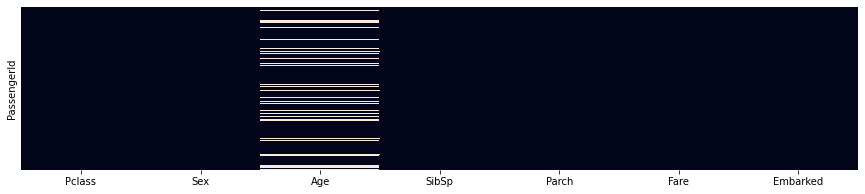

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [112]:
plt.figure(figsize=(15,3))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)
plt.show()
print(test_df.isnull().sum())

In [113]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [114]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [115]:
# For preprocessing the data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

col=['Sex','Embarked']
for x in col:
    test_df[x]=le.fit_transform(test_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Sex
mapping {'female': 0, 'male': 1}
Feature Embarked
mapping {'C': 0, 'Q': 1, 'S': 2}


In [116]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


## Implementing model 

In [117]:
X_test_new  = test_df.values[:,:]

In [118]:
X_test_new = scaler.transform(X_test_new)
print(X_test_new)

[[ 3.00000000e+00  1.00000000e+00  3.45000000e+01 ... -5.38289951e-17
   7.82920000e+00  1.00000000e+00]
 [ 3.00000000e+00  1.15632656e-16  4.70000000e+01 ... -5.38289951e-17
   7.00000000e+00  2.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00  6.20000000e+01 ... -5.38289951e-17
   9.68750000e+00  1.00000000e+00]
 ...
 [ 3.00000000e+00  1.00000000e+00  3.85000000e+01 ... -5.38289951e-17
   7.25000000e+00  2.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00  3.02725904e+01 ... -5.38289951e-17
   8.05000000e+00  2.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00  3.02725904e+01 ...  1.00000000e+00
   2.23583000e+01  4.98416622e-17]]


In [119]:
Y_pred_new=model_SVC_tune.predict(X_test_new)

In [120]:
print(Y_pred_new)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0]


In [121]:
print(Y_pred_new.shape) 

(418,)


In [122]:
df=pd.read_csv(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\data\gender_submission.csv',header=0)

In [123]:
df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,0
9,901,0


In [124]:
df['Survived']=Y_pred_new

In [125]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [127]:
df.to_csv(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\data\gender_submission.csv',
          index=False,header=True)

## Dumping All Models

In [129]:
## saving model:
pickle.dump(classifier,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\log.pkl','wb'))

pickle.dump(classifier_SGD,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\sgd.pkl','wb'))

pickle.dump(classifier_SGD_tune,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\sgd_tune.pkl','wb'))

pickle.dump(model_KNN,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\knn.pkl','wb'))

pickle.dump(model_KNN_tune,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\knn_tune.pkl','wb'))

pickle.dump(svc_model,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\svc.pkl','wb'))

pickle.dump(model_SVC_tune,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\svc_tune.pkl','wb'))

pickle.dump(model_DecisionTree,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\dt.pkl','wb'))

pickle.dump(model_DecisionTree_tune,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\dt_tune.pkl','wb'))

pickle.dump(model_RandomForest,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\rt.pkl','wb'))

pickle.dump(model_RandomForest_tune,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\rt_tune.pkl','wb'))

pickle.dump(ensemble,
            open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\ensemble.pkl','wb'))
